In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r'../../data/tidy/large/trajectories-mapped-powertrain-weight-grade-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [8]:
quantile_1 = df['acc'].quantile(0.0001)
quantile_99 = df['acc'].quantile(0.9999)
print("quantile_1",quantile_1)
print("quantile_99",quantile_99)

# Trimming the data
df = df[(df['acc'] >= quantile_1) & (df['acc'] <= quantile_99)]

quantile_1 -1.676924790528887
quantile_99 3.890559801731388


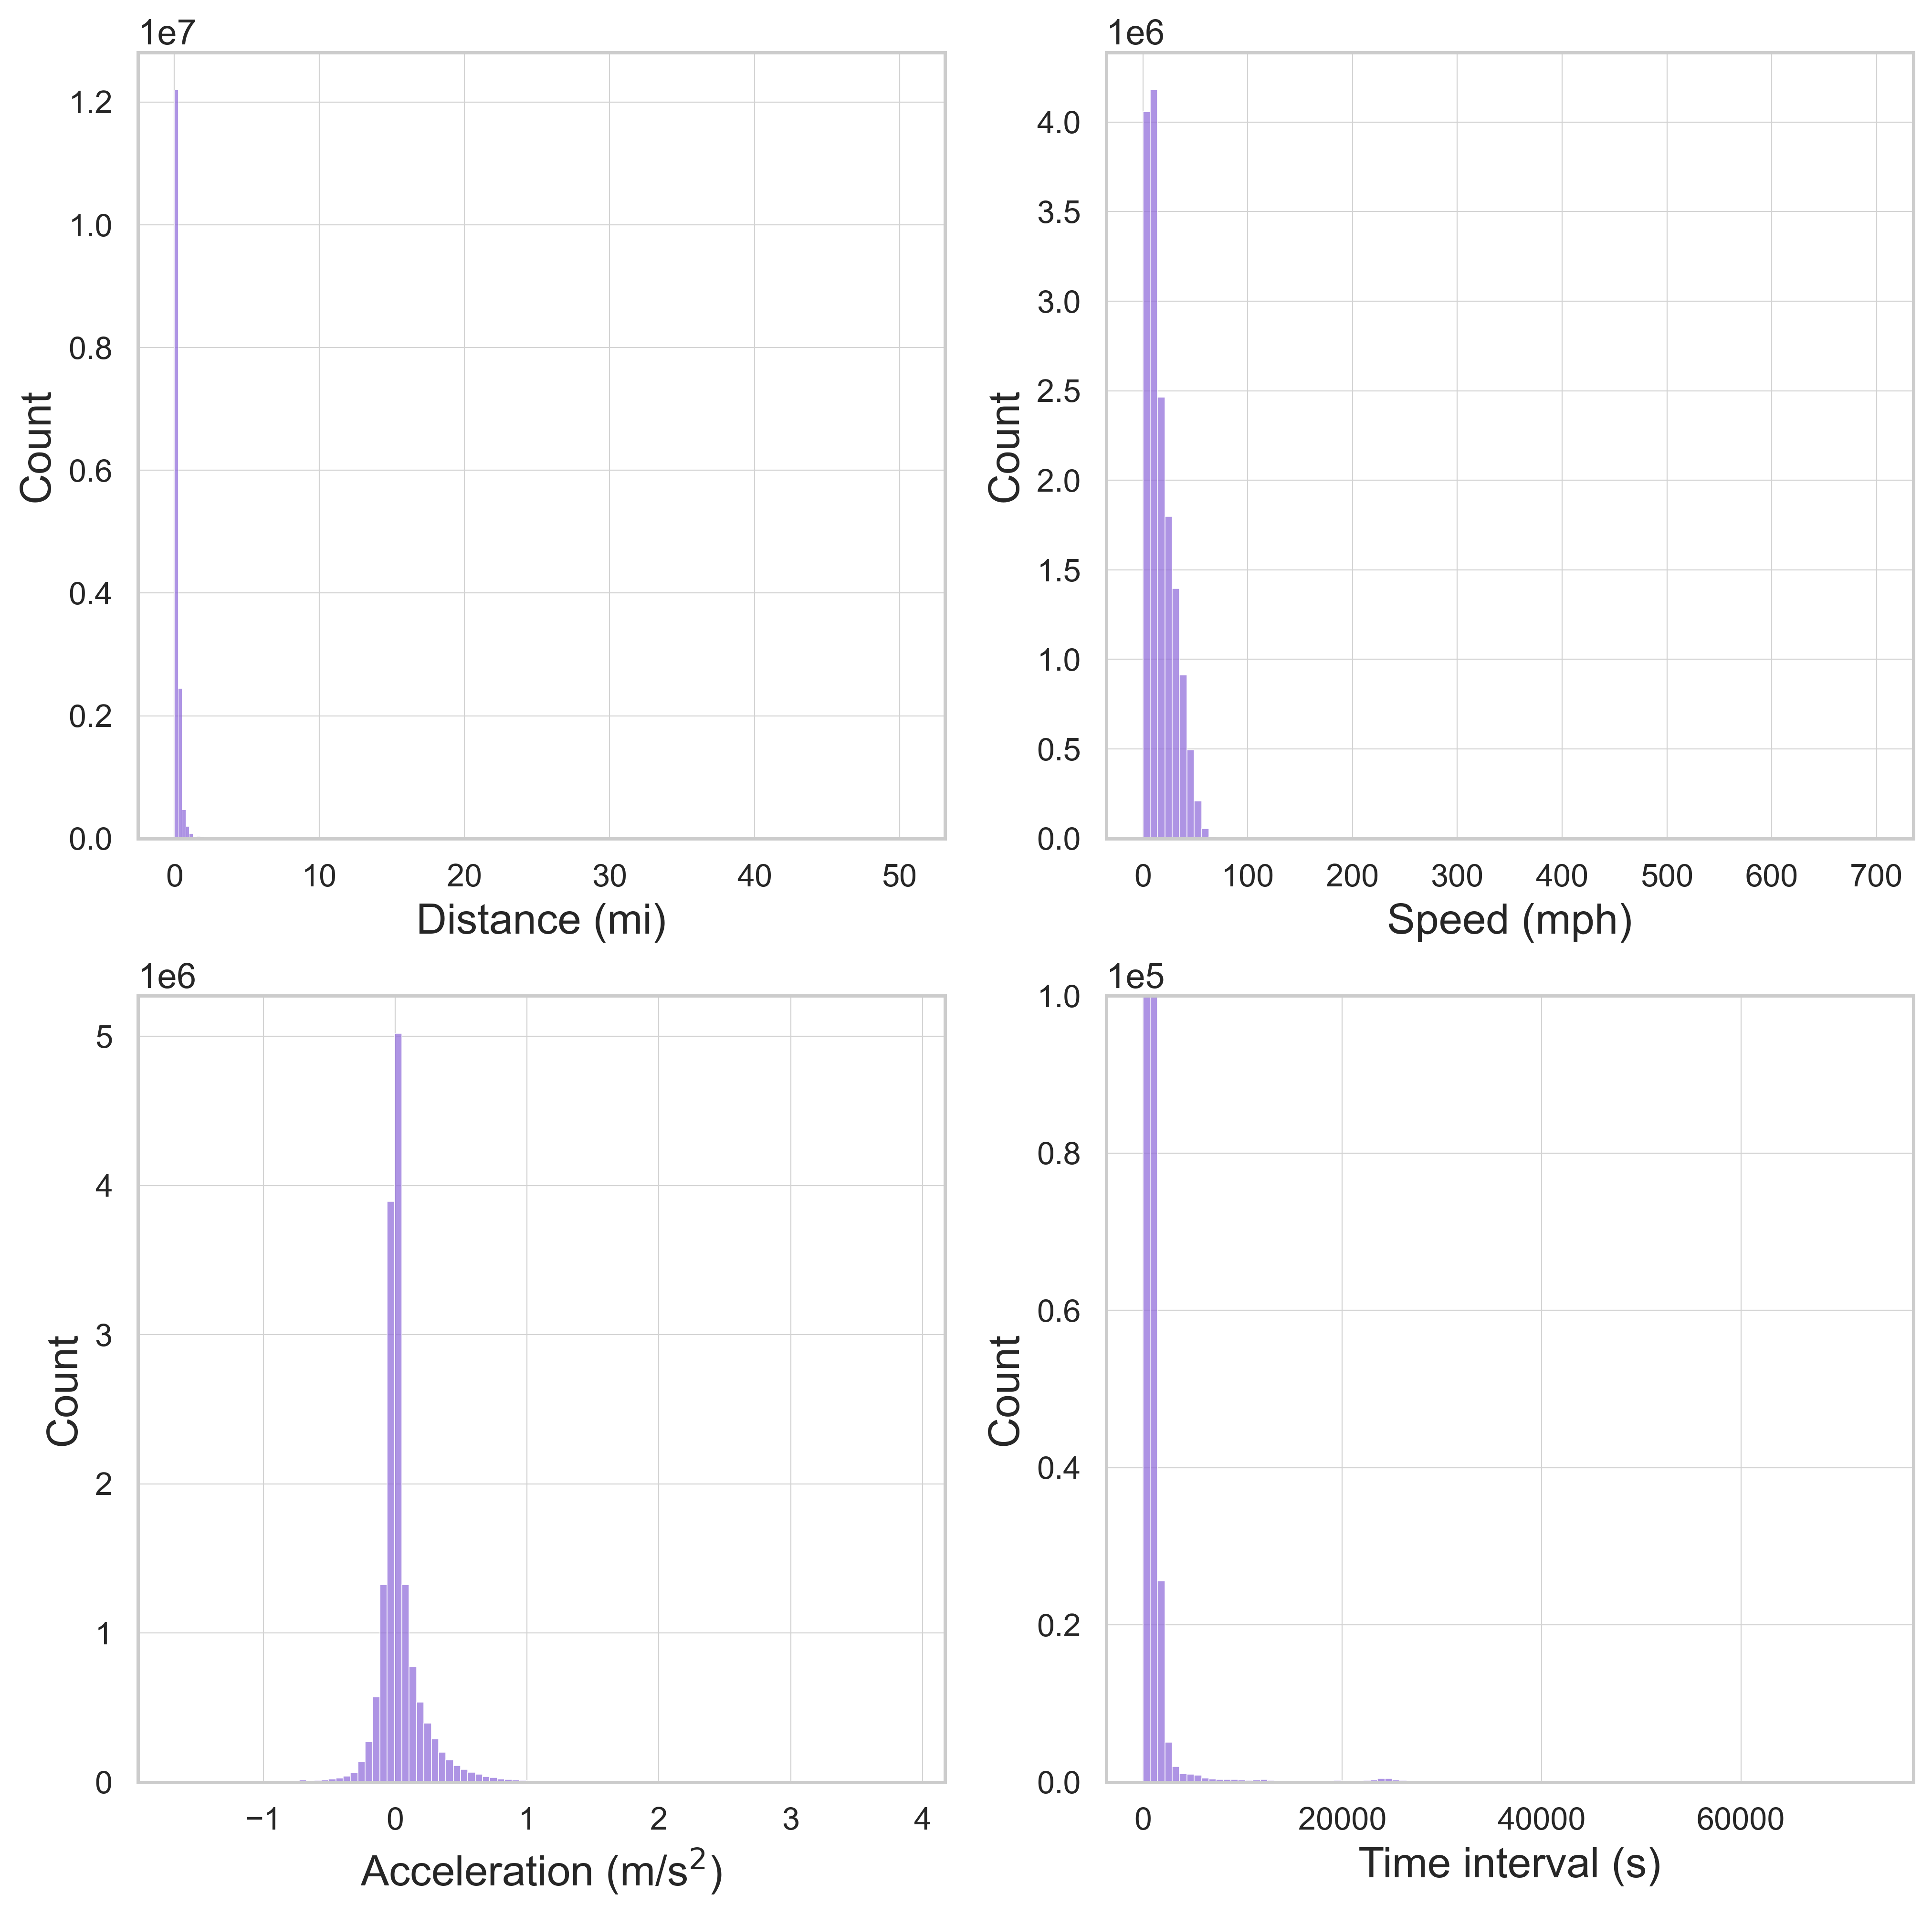

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with two columns and two rows
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), dpi=400)

# set style and font size
sns.set(style='whitegrid', font_scale=1.2)

# create histogram with curve for each variable
sns.histplot(data=df, x='dist', bins=200, color='mediumpurple', ax=axs[0, 0])
axs[0, 0].set_xlabel('Distance (mi)', fontsize=16)
axs[0, 0].set_ylabel('Count', fontsize=16)
axs[0, 0].tick_params(axis='x', labelsize=12)
axs[0, 0].tick_params(axis='y', labelsize=12)
#axs[0, 0].set_xlim(0, 5)
#axs[0, 0].set_ylim(0, 500000)
axs[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
axs[0, 0].grid(color='lightgrey', linewidth=0.4)


sns.histplot(data=df, x='speed', bins=100, color='mediumpurple', ax=axs[0, 1])
axs[0, 1].set_xlabel('Speed (mph)', fontsize=16)
axs[0, 1].set_ylabel('Count', fontsize=16)
axs[0, 1].tick_params(axis='x', labelsize=12)
axs[0, 1].tick_params(axis='y', labelsize=12)
#axs[0, 1].set_xlim(0, 80)
#axs[0, 1].set_ylim(0, 78000)
axs[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
axs[0, 1].grid(color='lightgrey', linewidth=0.4)


sns.histplot(data=df, x='acc', bins=100, color='mediumpurple', ax=axs[1, 0])
axs[1, 0].set_xlabel(r'Acceleration (m/s$^2$)', fontsize=16)
axs[1, 0].set_ylabel('Count', fontsize=16)
axs[1, 0].tick_params(axis='x', labelsize=12)
axs[1, 0].tick_params(axis='y', labelsize=12)
#axs[1, 0].set_xlim(-5, 5)
#axs[1, 0].set_ylim(0, 600000)
axs[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
axs[1, 0].grid(color='lightgrey', linewidth=0.4)


sns.histplot(data=df, x='time_delta_in_seconds', bins=100, color='mediumpurple', ax=axs[1, 1])
axs[1, 1].set_xlabel('Time interval (s)', fontsize=16)
axs[1, 1].set_ylabel('Count', fontsize=16)
axs[1, 1].tick_params(axis='x', labelsize=12)
axs[1, 1].tick_params(axis='y', labelsize=12)
#axs[1, 1].set_xlim(-5, 5)
axs[1, 1].set_ylim(0, 100000)
axs[1, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
axs[1, 1].grid(color='lightgrey', linewidth=0.4)

# save figure
plt.savefig(r'../../figures/hist-trajectories-facet-whole-year.png', dpi=600, bbox_inches='tight')

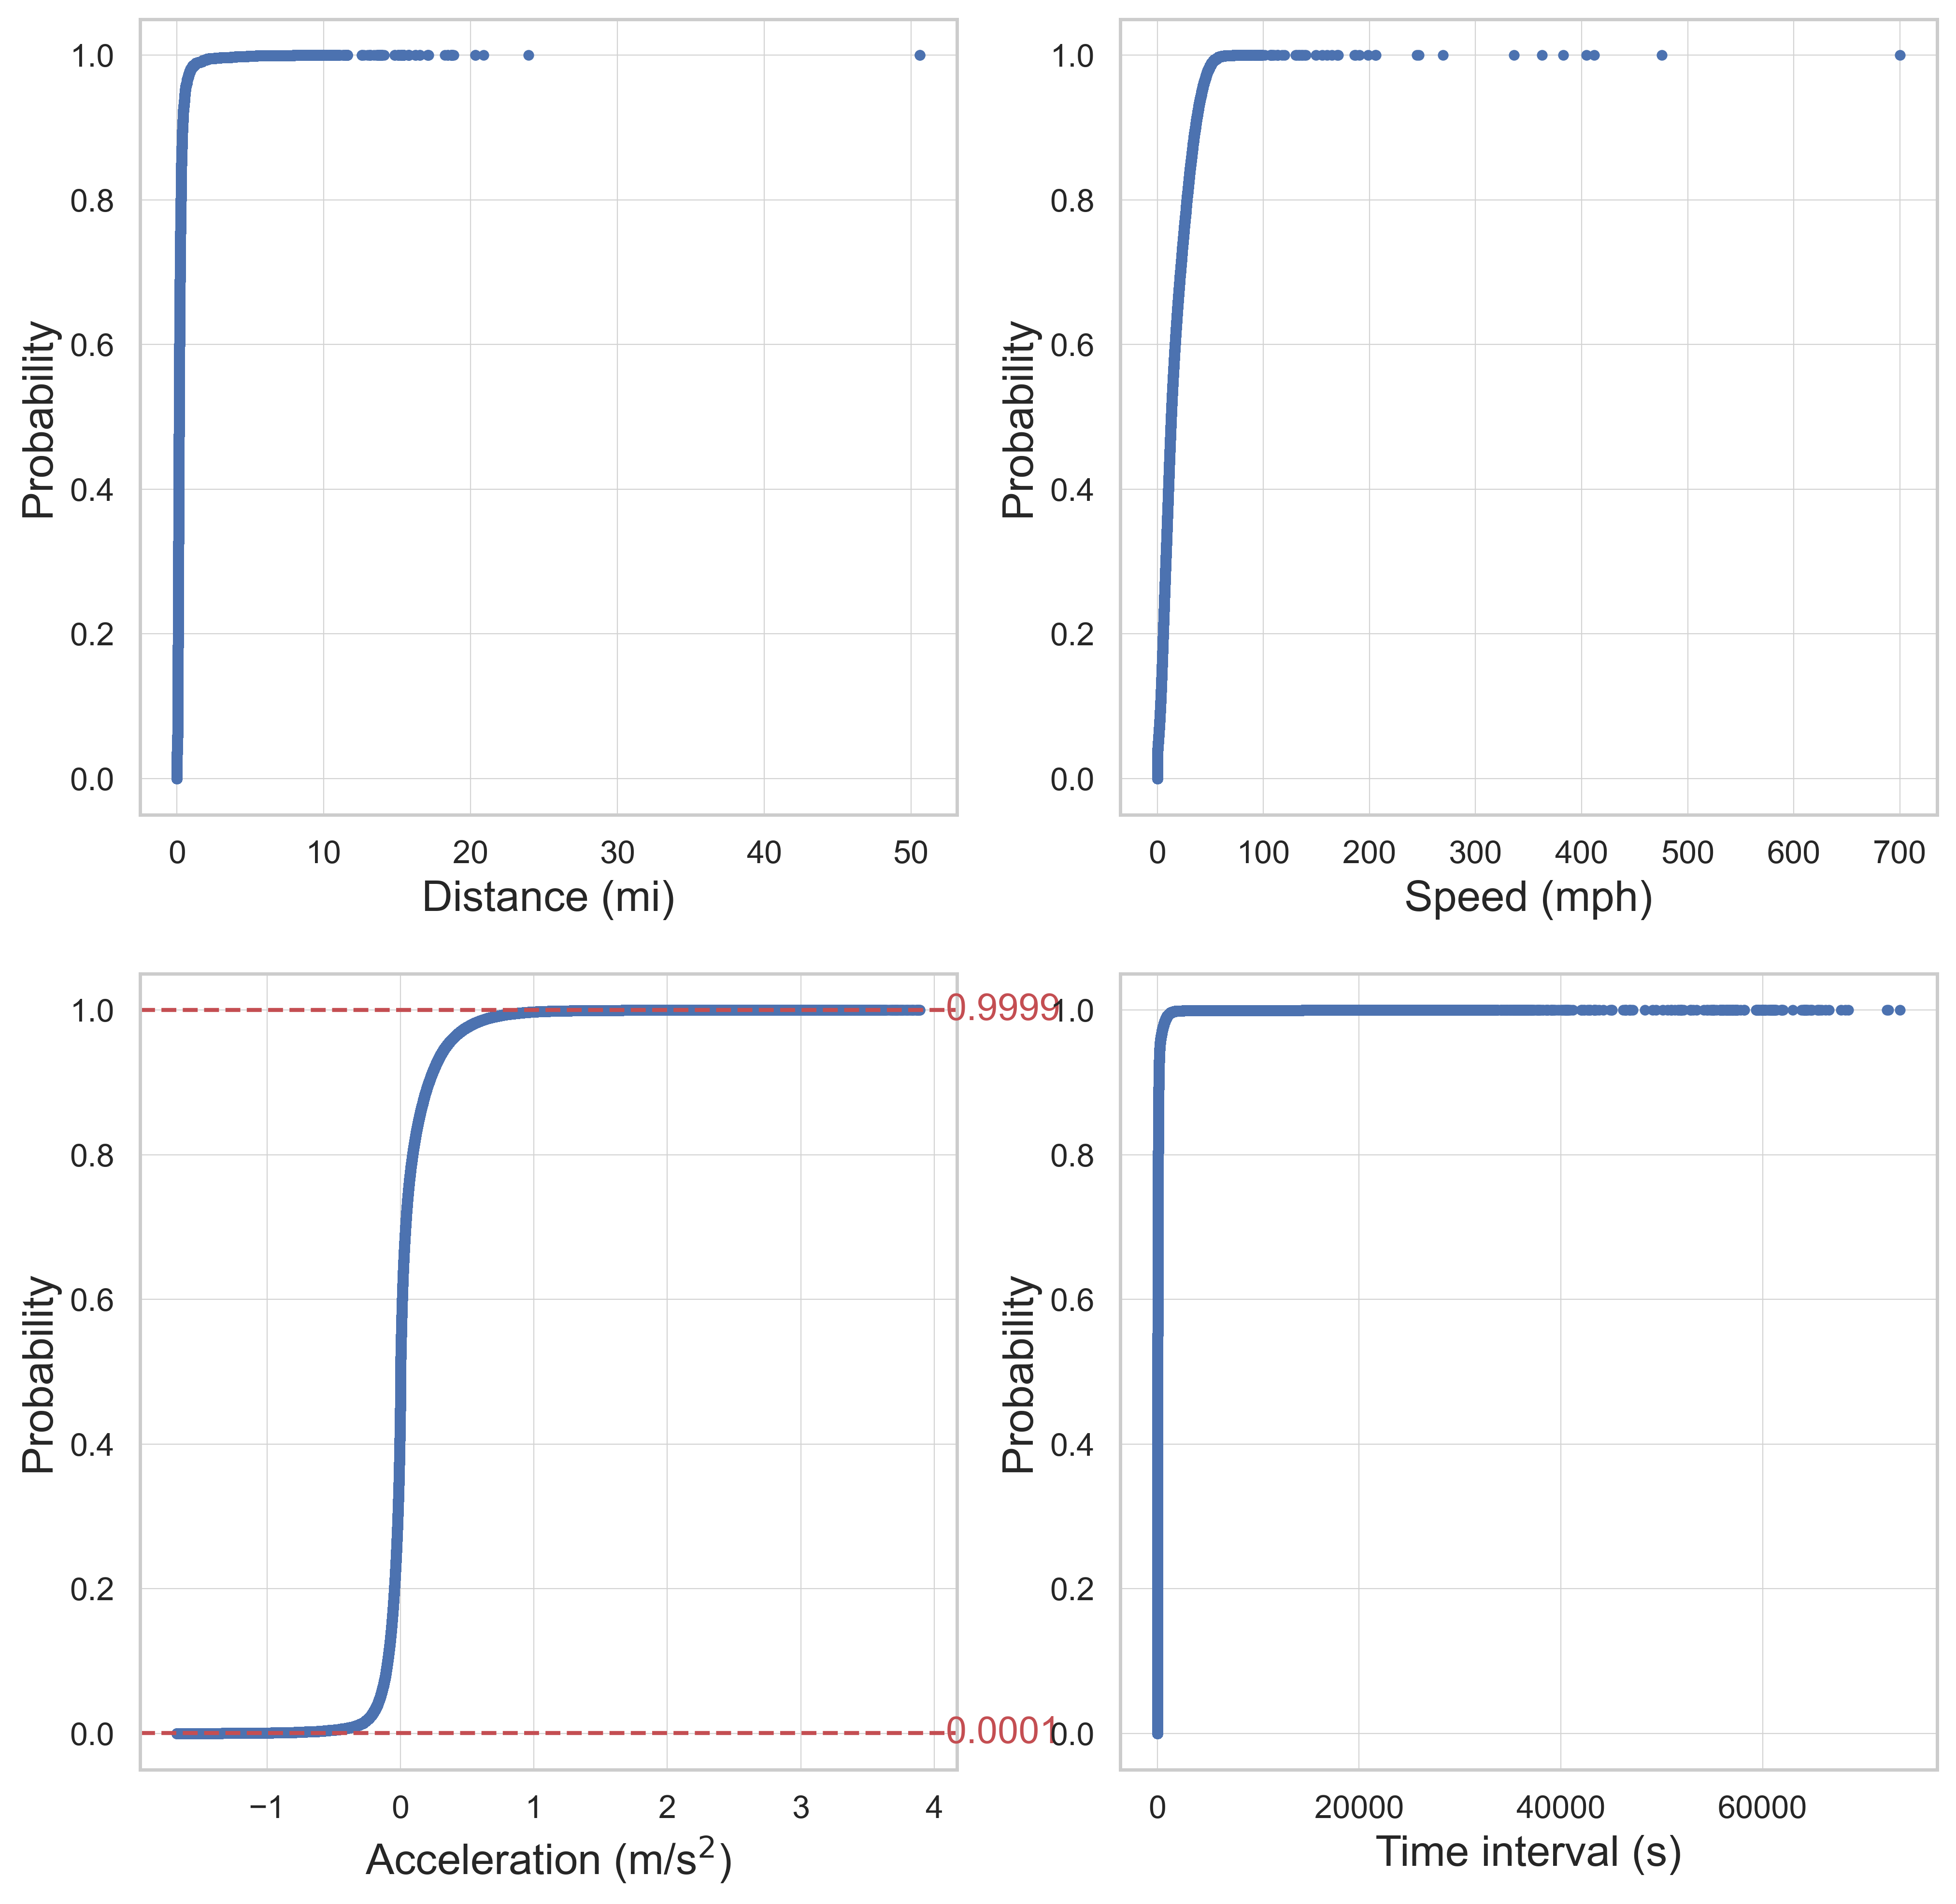

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# create a figure with two columns and two rows
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12), dpi=400)

# set style and font size
sns.set(style='whitegrid', font_scale=1.2)

# Variables to plot
variables = ['dist', 'speed', 'acc', 'time_delta_in_seconds']

for i, var in enumerate(variables):
    # Calculate the CDF values
    data = np.sort(df[var])
    cdf = np.arange(1, len(data)+1) / len(data)
    
    # Create CDF plot
    ax = axs[i//2, i%2]
    ax.plot(data, cdf, marker='.', linestyle='none')
    
    # Set labels and styles
    ax.set_xlabel(var.capitalize(), fontsize=16)
    ax.set_ylabel('Probability', fontsize=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, color='lightgrey', linewidth=0.4)

    # For acceleration plot, add horizontal lines and text
    if var == 'acc':
        ax.axhline(y=0.0001, color='r', linestyle='--')
        ax.axhline(y=0.9999, color='r', linestyle='--')
        ax.text(max(data)*1.05, 0.0001, '0.0001', verticalalignment='center', color='r', fontsize=14)
        ax.text(max(data)*1.05, 0.9999, '0.9999', verticalalignment='center', color='r', fontsize=14)
axs[0, 0].set_xlabel('Distance (mi)', fontsize=16)
axs[0, 1].set_xlabel('Speed (mph)', fontsize=16)
axs[1, 0].set_xlabel(r'Acceleration (m/s$^2$)', fontsize=16)
axs[1, 1].set_xlabel('Time interval (s)', fontsize=16)

# save figure
#plt.savefig(r'../../figures/custom-cdf-trajectories-facet-whole-year.png', dpi=600, bbox_inches='tight')
plt.show()
